The plots are based on these 2 articles.

1. [Python Seaborn tutarial](https://elitedatascience.com/python-seaborn-tutorial)  
2. [Medium Seaborn beginner tutorial](https://medium.com/beeranddiapers/distribution-plotspermalink-f215d47d854e)   

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/gargharshal/Learning-Notebooks/master/Seaborn/Pokemon.csv', 
                 encoding="unicode_escape")
df.drop(['#'], axis = 1, inplace = True)
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       151 non-null    object
 1   Type 1     151 non-null    object
 2   Type 2     67 non-null     object
 3   Total      151 non-null    int64 
 4   HP         151 non-null    int64 
 5   Attack     151 non-null    int64 
 6   Defense    151 non-null    int64 
 7   Sp. Atk    151 non-null    int64 
 8   Sp. Def    151 non-null    int64 
 9   Speed      151 non-null    int64 
 10  Stage      151 non-null    int64 
 11  Legendary  151 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 13.2+ KB


In [4]:
df['Type 1'].unique(), df['Type 2'].unique()

(array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
        'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
        'Dragon'], dtype=object),
 array(['Poison', nan, 'Flying', 'Ground', 'Fairy', 'Grass', 'Fighting',
        'Psychic', 'Steel', 'Ice', 'Rock', 'Water'], dtype=object))

## Scatter Plot

- regplot
- lmplot
- scatter (matplotlib)

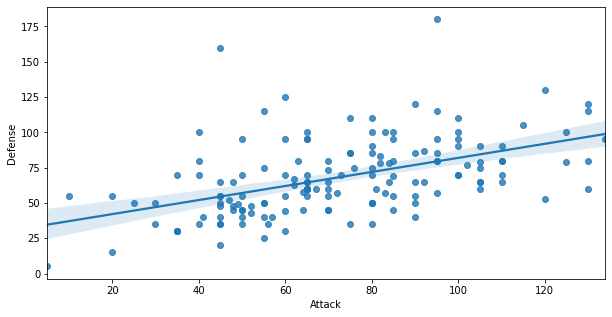

In [5]:
# sns.lmplot(x = df['Attack'], y = df['Defense']) # dosen't work
fig, ax = plt.subplots(figsize = (10, 5))
sns.regplot(x = 'Attack', y = 'Defense', 
            data = df, 
            ax = ax,
            fit_reg = True); # This will create the regression line

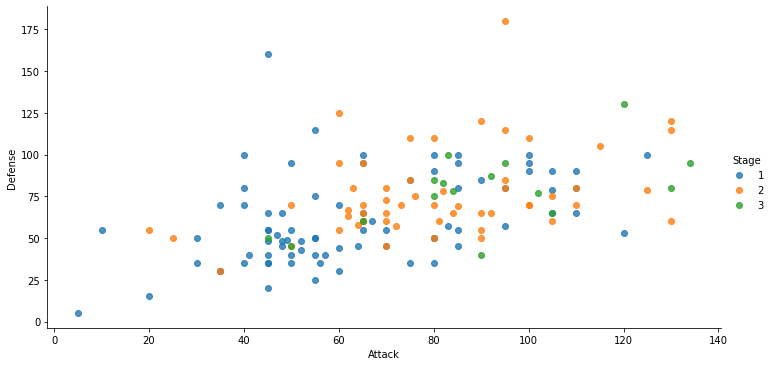

In [6]:
# in general the above method works for all but not for lmplot and joinplot
sns.lmplot(x = 'Attack', y = 'Defense', data = df, 
           hue = 'Stage', # define subsets of the data           
           fit_reg = False, #this would have created 3 reg lines
           height = 5, aspect = 2); # alternative to chnage figsize

## Boxplot

1. [68-95-99.7 Rule](https://towardsdatascience.com/understanding-the-68-95-99-7-rule-for-a-normal-distribution-b7b7cbf760c2)  
2. [Gaussain Distribution](https://en.wikipedia.org/wiki/Normal_distribution)  
3. [BoxPlot](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51) 

<img src ="https://github.com/gargharshal/Learning-Notebooks/blob/master/images/boxplot.png?raw=true" width = '500'/>

- You need to have information on the variability or dispersion of the data. A boxplot is a graph that gives you a good indication of how the values in the data are spread out.

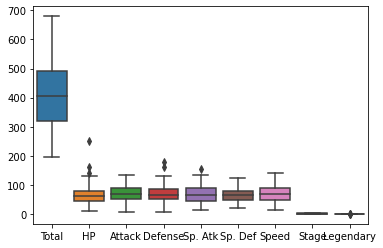

In [7]:
sns.boxplot(data = df);

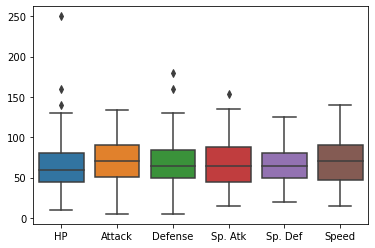

In [8]:
# for a better visual, remove the extremes
sns.boxplot(data = df.drop(['Total', 'Stage', 'Legendary'], axis = 1));

## Vilon Plot
[Kernel Density Function](https://mathisonian.github.io/kde/) - This can be useful if you want to visualize just the “shape” of some data, as a kind of continuous replacement for the discrete histogram.   
[Vilon Plot](https://towardsdatascience.com/violin-plots-explained-fb1d115e023d)  

![](https://raw.githubusercontent.com/gargharshal/Learning-Notebooks/master/images/vilon-plot.png)  

The unquestionable advantage of the violin plot over the box plot is that aside from showing the abovementioned statistics it also shows the entire distribution of the data. This is of interest, especially when dealing with **multinomial** data, i.e., a distribution with more than one peak.  
For ex -  
![](https://miro.medium.com/max/520/1*TTMOaNG1o4PgQd-e8LurMg.png)

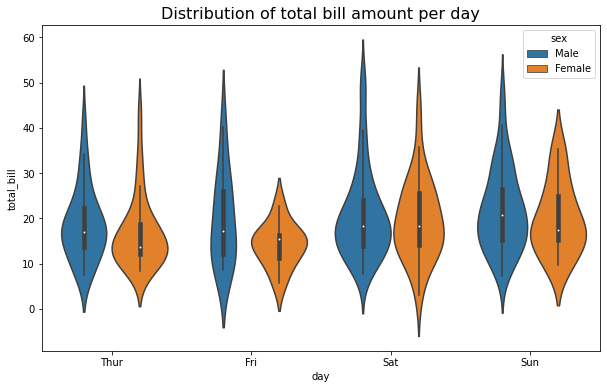

In [10]:
tips = sns.load_dataset("tips")
plt.figure(figsize = (10, 6))
ax = sns.violinplot(x="day", y="total_bill", hue="sex", data=tips)
ax.set_title('Distribution of total bill amount per day', fontsize=16);

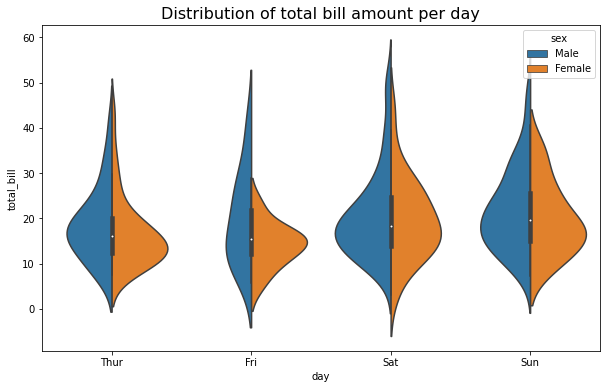

In [11]:
tips = sns.load_dataset("tips")
plt.figure(figsize = (10, 6))
ax = sns.violinplot(x="day", y="total_bill", 
                    hue="sex", data=tips,
                   split = True) # this will create 
ax.set_title('Distribution of total bill amount per day', fontsize=16);

## Swarm Plots
[Swarm Plots](https://medium.com/@harrison.hardin/swarm-plots-with-overlaid-box-plots-18c35912c049)  
- Represents distribution of data
- The dots that are together represent multiple occurance of the same value.

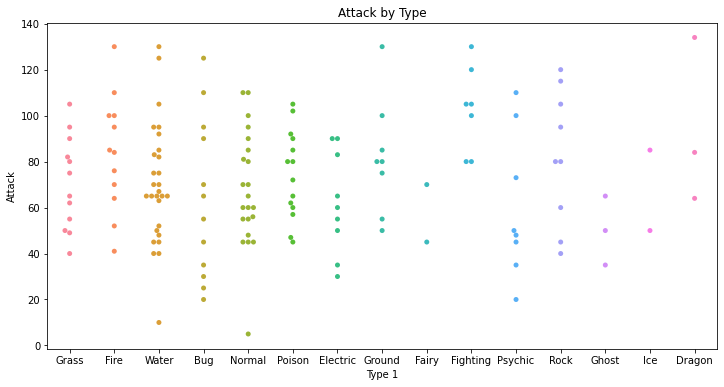

In [23]:
plt.figure(figsize=(12,6))
plt.title('Attack by Type')

sns.swarmplot(x = 'Type 1', y = 'Attack', data = df); #make it transparent

<AxesSubplot:title={'center':'Attack by Type'}, xlabel='Type 1', ylabel='Attack'>

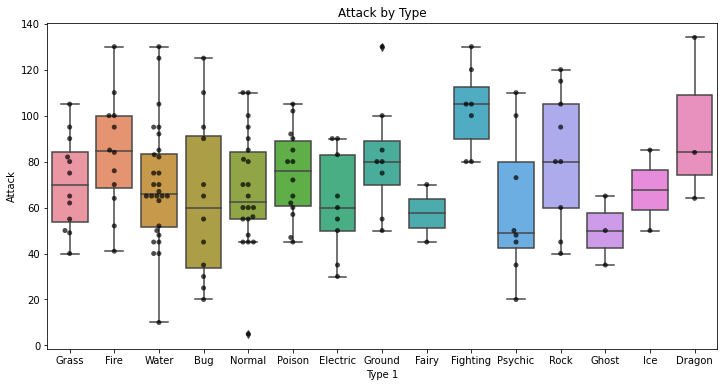

In [22]:
plt.figure(figsize=(12,6))
plt.title('Attack by Type')

sns.swarmplot(x = 'Type 1', y = 'Attack', data = df, color = 'black', 
             alpha = 0.7); #make it transparent
sns.boxplot(x = 'Type 1', y = 'Attack', data = df)